In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import argparse
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

__author__ = "Fabio Steven Tovar Ramos"
__version__ = "1.0"
__email__ = "fstovarr@unal.edu.co"
__title__ = "Cognitive Agent evaluation"

# Data exploration

In [2]:
df = pd.read_csv("data/data.csv", index_col=0, )
df = df[df['reward']==1].reset_index()
df.drop('index', axis=1, inplace=True)
df

,time,radio,reward,distance,power
0,0,0.499766,1.0,0.292595,27
1,2,0.947882,1.0,0.280822,11
2,5,1.895581,1.0,0.761587,11
3,7,2.191366,1.0,1.511366,27
4,9,2.746923,1.0,1.324630,17
5,11,2.621918,1.0,1.404498,44
6,13,2.829604,1.0,1.719795,22
7,14,2.832576,1.0,1.842077,27
8,17,2.699949,1.0,1.569145,19
9,18,2.790355,1.0,1.183218,10


In [3]:
df.describe()

,time,radio,reward,distance,power
count,1112.000000,1112.000000,1112.0,1112.000000,1112.000000
mean,24.959532,2.741855,1.0,1.908818,20.825540
std,14.379490,0.661811,0.0,1.001416,8.198931
min,0.000000,0.417234,1.0,0.003907,10.000000
25%,13.000000,2.547950,1.0,1.185962,13.000000
50%,25.000000,2.866986,1.0,1.786633,20.000000
75%,38.000000,3.175110,1.0,2.553610,27.000000
max,49.000000,3.910150,1.0,4.661030,48.000000


/home/fabiotovar/.anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  ax.set_xlim(boundaries_list[j])
/home/fabiotovar/.anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  ax.set_ylim(boundaries_list[i])
/home/fabiotovar/.anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  ax.set_xlim(boundaries_list[i])


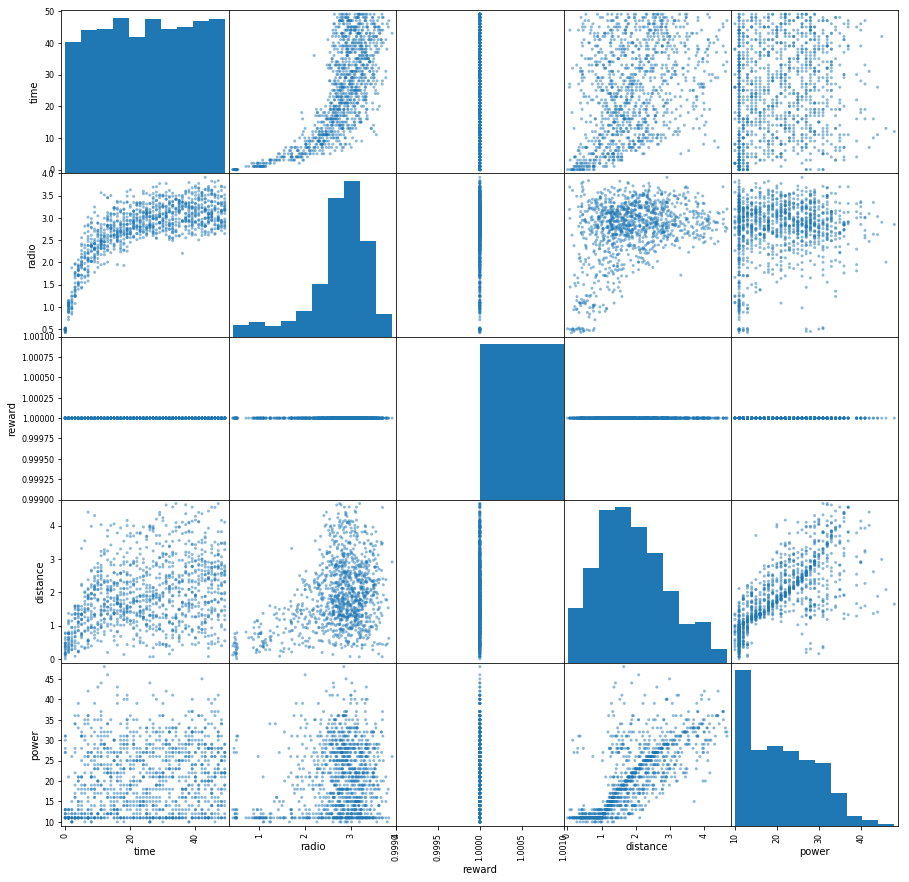

In [4]:
fig = scatter_matrix(df, figsize=(15, 15))
plt.savefig("plots/scatter.png", bbox_inches='tight', dpi=100)

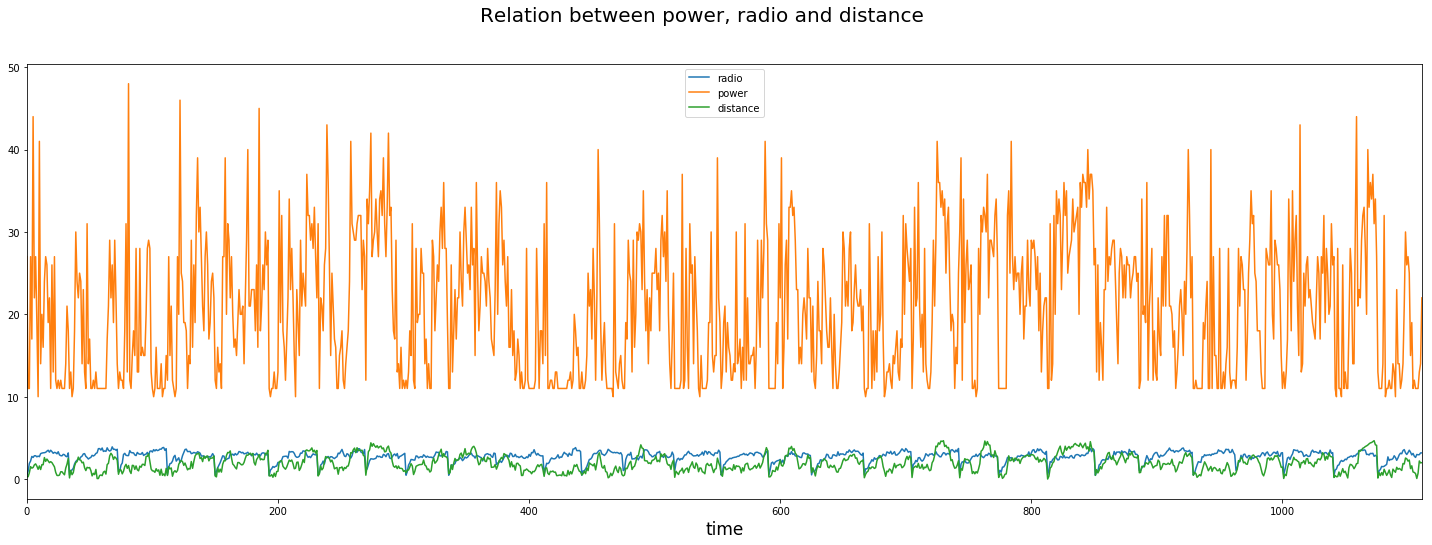

In [5]:
df[['radio', 'power', 'distance']].plot(figsize=(25, 8))
plt.suptitle("Relation between power, radio and distance", fontsize=20)
plt.xlabel("time", fontsize=17)
plt.savefig("plots/features.png", dpi=100, bbox_inches='tight')

# Cognitive agent training

In [6]:
from tensorflow.keras.utils import plot_model
from agents.cognitive_agent import CognitiveAgent

In [7]:
agent = CognitiveAgent(3)
plot_model(agent.model, to_file="plots/agent_architecture.png", show_shapes=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [8]:
features = ['distance', 'radio', 'time']

In [9]:
X = df[features].to_numpy()
Y = df['power'].to_numpy()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=10)

In [11]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
y_scaler = StandardScaler().fit(y_train.reshape(-1,1))
y_train = y_scaler.transform(y_train.reshape(-1,1))
y_test = y_scaler.transform(y_test.reshape(-1,1))

/home/fabiotovar/.anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/fabiotovar/.anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/fabiotovar/.anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
history = agent.learn(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 889 samples, validate on 223 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
889/889 [==============================] - 0s 326us/sample - loss: 0.8034 - mean_absolute_error: 0.7421 - mean_squared_error: 0.8034 - val_loss: 0.6136 - val_mean_absolute_error: 0.6578 - val_mean_squared_error: 0.6136
Epoch 2/100
889/889 [==============================] - 0s 127us/sample - loss: 0.5624 - mean_absolute_error: 0.5932 - mean_squared_error: 0.5624 - val_loss: 0.4685 - val_mean_absolute_error: 0.5306 - val_mean_squared_error: 0.4685
Epoch 3/100
889/889 [==============================] - 0s 106us/sample - loss: 0.4545 - mean_absolute_error: 0.4964 - mean_squared_error: 0.4545 - val_loss: 0.4243 - val_mean_absolute_error: 0.4622 - val_mean_squared_error: 0.4243
Epoch 4/100
889/889 [==============================] - 0s 91us/sample - loss: 0.4236 - mean_absolute_error: 0.4540 - mean_squared_error: 0.4236 - val_loss: 0.4171 - val_mean_absolute_error: 0.4430 - val_mean_squar

889/889 [==============================] - 0s 98us/sample - loss: 0.3963 - mean_absolute_error: 0.4297 - mean_squared_error: 0.3963 - val_loss: 0.4108 - val_mean_absolute_error: 0.4433 - val_mean_squared_error: 0.4108
Epoch 36/100
889/889 [==============================] - 0s 99us/sample - loss: 0.3962 - mean_absolute_error: 0.4330 - mean_squared_error: 0.3962 - val_loss: 0.4185 - val_mean_absolute_error: 0.4363 - val_mean_squared_error: 0.4185
Epoch 37/100
889/889 [==============================] - 0s 123us/sample - loss: 0.3967 - mean_absolute_error: 0.4318 - mean_squared_error: 0.3967 - val_loss: 0.4151 - val_mean_absolute_error: 0.4371 - val_mean_squared_error: 0.4151
Epoch 38/100
889/889 [==============================] - 0s 101us/sample - loss: 0.3950 - mean_absolute_error: 0.4290 - mean_squared_error: 0.3950 - val_loss: 0.4102 - val_mean_absolute_error: 0.4481 - val_mean_squared_error: 0.4102
Epoch 39/100
889/889 [==============================] - 0s 129us/sample - loss: 0.3945 

# Agent performance evaluation

In [14]:
import numpy as np
from sklearn.metrics import accuracy_score

In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
38,0.394496,0.432646,0.394496,0.419159,0.436073,0.419159,38
39,0.395250,0.427699,0.395250,0.410814,0.444460,0.410814,39
40,0.395507,0.434091,0.395507,0.419844,0.435261,0.419844,40
41,0.395039,0.429912,0.395039,0.414825,0.442051,0.414825,41
42,0.394876,0.430448,0.394876,0.414508,0.438790,0.414508,42


In [16]:
hist.describe()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,0.416234,0.447078,0.416234,0.420409,0.446633,0.420409,21.000000
std,0.065940,0.052939,0.065940,0.031525,0.036140,0.031525,12.556539
min,0.394496,0.427699,0.394496,0.407846,0.433054,0.407846,0.000000
25%,0.397221,0.432062,0.397221,0.411281,0.436117,0.411281,10.500000
50%,0.401238,0.434261,0.401238,0.414508,0.437997,0.414508,21.000000
75%,0.406737,0.437296,0.406736,0.417050,0.441862,0.417050,31.500000
max,0.803434,0.742060,0.803434,0.613595,0.657835,0.613595,42.000000


KeyError: 'mae'

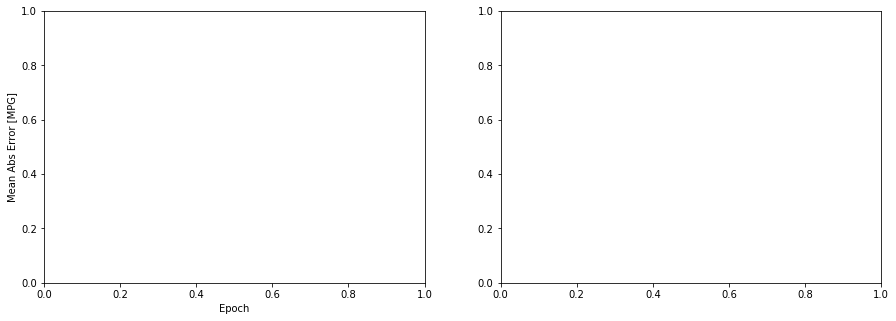

In [17]:
fig, axis = plt.subplots(1, 2, figsize=(15,5))

axis[0].set_xlabel('Epoch')
axis[0].set_ylabel('Mean Abs Error [MPG]')
axis[0].plot(hist["epoch"], hist["mae"], label='Train Error')
axis[0].plot(hist["epoch"], hist["val_mae"], label = 'Eval Error')
axis[0].legend()

axis[1].set_xlabel('Epoch')
axis[1].set_ylabel('Mean Square Error [$MPG^2$]')
axis[1].plot(hist["epoch"], hist["mse"], label='Train Error')
axis[1].plot(hist["epoch"], hist["val_mse"], label = 'Eval Error')
axis[1].legend()

fig.suptitle("Learning performance", fontsize=15)

plt.savefig("plots/learning_rates.png", dpi=100, bbox_inches='tight')

In [ ]:
evaluation = agent.model.evaluate(scaler.transform(X_test), y_scaler.transform(y_test), batch_size=128)
evaluation

In [ ]:
y_pred = np.round(y_scaler.inverse_transform(agent.model.predict(X_test)))
y_test = y_scaler.inverse_transform(y_test)
X_test = scaler.inverse_transform(X_test)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
for idx, axis in enumerate(ax):
    axis.set_ylabel("Power")
    axis.set_xlabel(features[idx])
    axis.scatter(X_test[:,idx], y_test, label="Test")
    axis.scatter(X_test[:,idx], y_pred, label="Predicted")
    axis.legend()
fig.suptitle("Model performance over test data", fontsize=15)
plt.savefig("plots/model_behavior.png", dpi=100, bbox_inches="tight")

# Save learned model and scaler

In [ ]:
agent.scalers = [scaler, y_scaler]
agent.save_state()

In [ ]:
#agent.load_state()
agent2 = CognitiveAgent(3)
agent2.load_state()

In [ ]:
prediction = agent2.get_action(X_test[0, :])

In [ ]:
print(prediction)
print(y_test[0,:][0])